In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


In [2]:
model = tf.keras.models.Sequential([
 tf.keras.layers.Conv2D(16, (3,3), activation='relu' ,
 input_shape=(100, 100, 3)),
 tf.keras.layers.MaxPooling2D(2, 2),
 tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
 tf.keras.layers.MaxPooling2D(2,2),
 tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
 tf.keras.layers.MaxPooling2D(2,2),
 tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
 tf.keras.layers.MaxPooling2D(2,2),
 tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
 tf.keras.layers.MaxPooling2D(2,2),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(512, activation='relu'),
 tf.keras.layers.Dense(1, activation='sigmoid')
])

### Data Augmentation

Using some Data Augmentation techniques for more data and Better results.

Shearing of images

Random zoom

Horizontal flips

In [13]:
##paths
#train path 
training_dir=r"C:\Users\shdgh\Downloads\observations-master\observations-master\experiements\dest_folder\train"
testing_dir=r"C:\Users\shdgh\Downloads\observations-master\observations-master\experiements\dest_folder\test"
validating_dir=r"C:\Users\shdgh\Downloads\observations-master\observations-master\experiements\dest_folder\val"


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#all image will be scaled by 1/255
#train 
train_datagen=ImageDataGenerator(rescale=1/255)
train_set=train_datagen.flow_from_directory(
     training_dir,
    target_size=(100,100),
    class_mode='binary')

#test
test_datagen=ImageDataGenerator(rescale=1/255)
test_set=test_datagen.flow_from_directory(
     testing_dir,
    target_size=(100,100),
    class_mode='binary')

#validate
val_datagen=ImageDataGenerator(rescale=1/255)
val_set=val_datagen.flow_from_directory(
     validating_dir,
    target_size=(100,100),
    class_mode='binary')



Found 1314 images belonging to 2 classes.
Found 194 images belonging to 2 classes.
Found 142 images belonging to 2 classes.


In [5]:
#fit the data into the model 

opt= tf.keras.optimizers.RMSprop(
    learning_rate=0.001, 
    name='RMSprop'
)

model.compile(loss='binary_crossentropy',
 optimizer=opt,
 metrics=['accuracy'])

model.fit(train_set,epochs = 18,
                        validation_data = test_set,
                        validation_steps = 10, 
                        #callbacks=[tensorboard]
                        )

Epoch 1/18
42/42 [==============================] - 18s 437ms/step - loss: 0.5284 - accuracy: 0.7504 - val_loss: 0.1306 - val_accuracy: 0.9641
Epoch 2/18
42/42 [==============================] - 16s 385ms/step - loss: 0.1590 - accuracy: 0.9429
Epoch 3/18
42/42 [==============================] - 17s 403ms/step - loss: 0.1978 - accuracy: 0.9505
Epoch 4/18
42/42 [==============================] - 17s 414ms/step - loss: 0.0906 - accuracy: 0.9718
Epoch 5/18
42/42 [==============================] - 17s 396ms/step - loss: 0.0970 - accuracy: 0.9642
Epoch 6/18
42/42 [==============================] - 19s 446ms/step - loss: 0.0833 - accuracy: 0.9711
Epoch 7/18
42/42 [==============================] - 16s 378ms/step - loss: 0.0560 - accuracy: 0.9840
Epoch 8/18
42/42 [==============================] - 16s 385ms/step - loss: 0.0388 - accuracy: 0.9871
Epoch 9/18
42/42 [==============================] - 16s 372ms/step - loss: 0.0475 - accuracy: 0.9855
Epoch 10/18
42/42 [==============================

### Prediction of Single Image


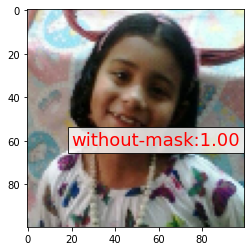

In [11]:
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np


img1 = image.load_img("58.jpg", target_size=(100, 100))
img = image.img_to_array(img1)
img = img/255


# create a batch of size 1 [N,H,W,C]

img = np.expand_dims(img, axis=0)
prediction = model.predict(img, batch_size=None,steps=1) #gives all class prob.

if(prediction[:,:]>0.5):
    value ='without-mask:%1.2f'%(prediction[0,0])
    
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='with-mask :%1.2f'%(1.0-prediction[0,0])
    plt.text(20,62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
plt.imshow(img1) 

plt.show()

In [47]:
import pandas as pd
test_set.reset
ytesthat = model.predict_generator(test_set)
df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':ytesthat[:,0],
    'y':test_set.classes
})

In [50]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)
df

,filename,predict,y,y_pred
0,with_mask\1-with-mask.jpg,0.00000,0,0
1,with_mask\106-with-mask.jpg,0.99993,0,1
2,with_mask\11-with-mask.jpg,0.00000,0,0
3,with_mask\110-with-mask.jpg,1.00000,0,1
4,with_mask\111-with-mask.jpg,0.99998,0,1
...,...,...,...,...
189,without_mask\74.jpg,0.00002,1,0
190,without_mask\79.jpg,0.00000,1,0
191,without_mask\89.jpg,0.00000,1,0
192,without_mask\93.jpg,0.00000,1,0


In [49]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 142 Validation image  : %d'%misclassified['y'].count())

Total misclassified image from 142 Validation image  : 103


#Prediction of test set
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value')

In [29]:
#save the model then use it with opencv library to detect live